In [7]:
%matplotlib inline

import sys
sys.path.append('../')

from agentsClasses.OfflineQLearningClass import OfflineQLearningAgent
from utilities.plots import create_grids, plot_trajectory

In [8]:
#Hyperparameters
show_stats = True       # show stats
render = True           # render the results after training

NUM_AGENTS = 1

SHAPE = "14x14"             # "5x5" or "14x14"

if SHAPE == "5x5":
    EPISODES_PER_AGENT = 1000
    MAX_STEPS_PER_EPISODE = 100
    FOLDER_NAME = "5x5_5_model"
elif SHAPE == "14x14":
    EPISODES_PER_AGENT = 3000
    MAX_STEPS_PER_EPISODE = 300
    FOLDER_NAME = "5_model"

REWARD = [1000, -10, 0.3]     #REARD, PENALTY, PENALTY_THRESHOLD

EPS_START = 1.0
EPS_DECAY = EPS_START/(EPISODES_PER_AGENT/2)  # reduce the exploration over time
EPS_END = 0.1

DISCOUNT_FACTOR = 0.95
LR = 0.02

In [9]:
#CREATING AND TRAINING THE AGENTS
agents_arr = []

print("Starting training of", NUM_AGENTS, "Q-learning agents")

for i in range(NUM_AGENTS):
    print("Agent", i+1, "/", NUM_AGENTS)
    agent = OfflineQLearningAgent(i, SHAPE, FOLDER_NAME, EPISODES_PER_AGENT, MAX_STEPS_PER_EPISODE, REWARD, LR, EPS_START, EPS_DECAY, EPS_END, DISCOUNT_FACTOR)
    
    agent.train()
    agents_arr.append(agent)

c:\Users\el_sa\anaconda3\envs\TFG\Lib\site-packages\gymnasium\envs\registration.py:694: UserWarning: WARN: Overriding environment gridOffline-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Starting training of 1 Q-learning agents
Agent 1 / 1
14x14
Loading models...
Loading models from folder: ../data/OfflineEnsembles/5_model/
Loading model: model_0.pt
Loading model: model_1.pt
Loading model: model_2.pt
Loading model: model_3.pt
Loading model: model_4.pt
Models loaded


100%|██████████| 3000/3000 [08:37<00:00,  5.79it/s]


La longitud estimada para el eje X del training error es: 207863


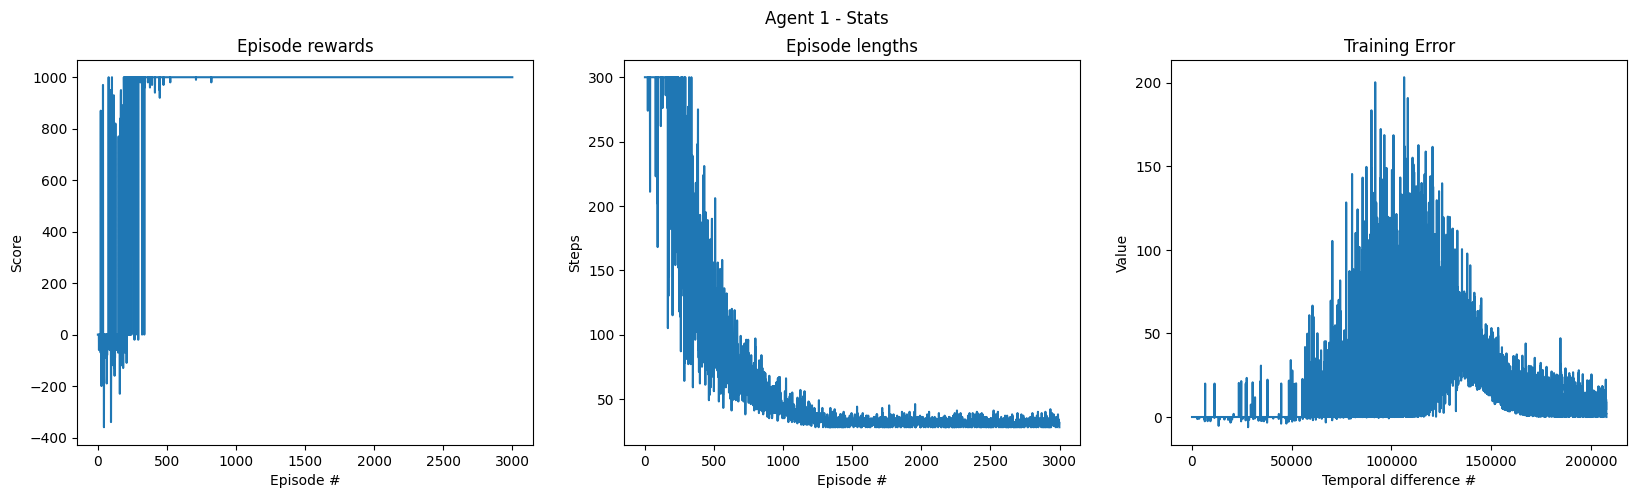

In [10]:
if show_stats:
    for agent in agents_arr:
        print("La longitud estimada para el eje X del training error es:", agent.total_steps)
        agent.plot_results(rolling_length=1, rolling_error=50)

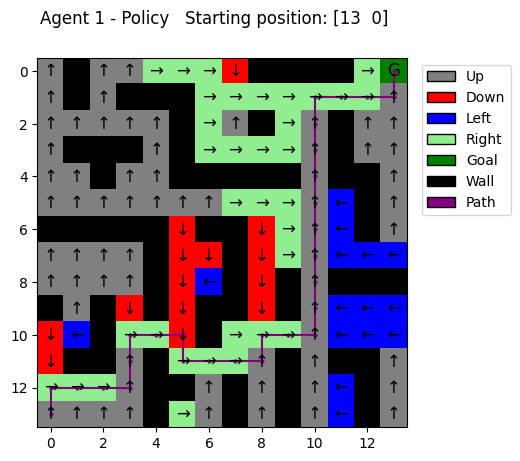

In [11]:
for agent in agents_arr:
    value_grid, policy_grid, string_policy_grid = create_grids(agent.env, agent=agent)
    start_pos = agent.env.unwrapped.start_pos

    if render:
        plot_trajectory(string_policy_grid, start_pos, agent.id+1)

In [12]:
#Hay muchos elementos en el rewardHistory que son iguales, quiero que solo haya uno de cada
#historico = dict.fromkeys(agent.env.unwrapped.rewardHistory)

print(len(agent.env.unwrapped.rewardHistory))

unicos = []

for i in agent.env.unwrapped.rewardHistory:

    stringo = str(i[0][0]) + ',' + str(i[0][1]) + ',' + str(i[1]) + ',' + str(i[2][0]) + ',' + str(i[2][1])
    
    if stringo not in unicos:
        unicos.append(stringo)

for stringo in unicos:
    print(stringo)

712
8,8,0,7,8
7,8,0,6,8
6,8,0,5,8
5,8,3,5,9
5,9,0,4,9
5,6,3,5,7
5,7,2,5,7
5,7,3,5,8
5,8,0,4,8
5,9,2,5,9
7,8,3,7,8
5,7,1,5,7
5,7,0,4,7
5,9,1,6,9
6,9,0,5,9
6,8,1,7,8
7,8,2,7,8
6,8,2,6,8
5,8,2,5,8
5,8,1,6,8
6,8,3,6,9
6,9,2,6,9
6,9,1,7,9
7,9,2,7,9
7,9,0,6,9
7,9,1,8,9
